# Módulo 1: Cómo interpretar y analizar automáticamente la información textual

## Scripts de los métodos explicados en el módulo



Hay métodos que requieren unas librerías especializadas en procesamiento del lenguaje natural (PLN) y en el análisis de textos. La librería que emplearemos para los métodos de PLN será NLTK (Natural Language Toolkit). En la siguiente dirección http://www.nltk.org y en el libro <i>Natural Language Processing with Python</i> (versión en línea: https://www.nltk.org/book/) puede obtenerse información acerca de la instalación de esta librería y de cómo puede hacerse procesamiento del lenguaje con ella.

Paquetes requeridos para ejecutar este notebook:
- NLTK, Wordcloud, SPARQLWrapper y lxml. Para la instalación podéis usar "pip" o "conda", según el sistema que tengáis instalado.

- Recordad que tenéis que mantener la misma estructura de las carpetas para que el código encuentre los ficheros .csv y las imágenes que se usan.

- La librería que emplearemos para el análisis textual será la librería Gensim. Para su instalación, consultad: https://radimrehurek.com/gensim/install.html

<u>Nota</u>: Se recomienda emplear la versión 3.6 o 3.7 de Python.

In [1]:
#Importación de las librerías NLTK y Gensim

import nltk
import gensim

La siguiente instrucción que debéis ejecutar es "nltk.download()". Al ejecutarla, si esperáis un momento, se os abrirá una ventana emergente con los complementos de NLTK. Hay que seleccionar "ALL" (o en caso de línea de comandos usar el identificador "all") e instalarlos todos, así lo tendréis todo listo.

Si obtenemos un error relacionado con los certificados SSL, es posible que debamos instalar los certificados para el uso de SSL desde Python, mediante el comando "Install Certificates.command". Por ejemplo, basta con ejecutar una <i>shell</i> con:

> /Applications/Python\ 3.6/Install\ Certificates.command

In [2]:
# Si ejecutas el notebook desde Google Colab y no ejecutas nltk.download()
# al menos, debes descargar los siguientes complementos:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alex/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Los siguientes scripts corresponden a los pasos explicados en los apuntes del módulo 1.

## 1. Detección de palabras sin preprocesado ##

### 1.1 Listar palabras con el método <i>split</i> ###

In [3]:
#Queremos listar las palabras de un titular del NYT
headline = "The \"Daily Show\" host said the attacks of the president on fellow Republicans at a meeting reminded \
him of a drunk uncle calling everyone out at a wedding.\""

#Word_candidates es la lista de palabras resultado de hacer un split del texto allá donde hay un espacio en blanco.
#Consideramos que el resultado es una lista de candidatos porque en realidad, como se explica en el módulo,
#no todos son realmente palabras.
word_candidates = headline.split()
print(word_candidates)

['The', '"Daily', 'Show"', 'host', 'said', 'the', 'attacks', 'of', 'the', 'president', 'on', 'fellow', 'Republicans', 'at', 'a', 'meeting', 'reminded', 'him', 'of', 'a', 'drunk', 'uncle', 'calling', 'everyone', 'out', 'at', 'a', 'wedding."']


### 1.2 Contar los candidatos a palabra obtenidos con el método <i>split</i> y según la relación significante-significado ###

In [4]:
#Importamos el método que crea un diccionario con la frecuencia de aparición de los elementos en una lista
from collections import Counter

#Método split
word_candidates = headline.split()
#Número de veces que los candidatos a palabra aparecen en el texto
print("CÁLCULO MÉTODO SPLIT:", Counter(word_candidates), "\n")

#Relación significante-significado
#Creamos una lista de candidatos a los que les quitamos los símbolos '"' y '.' (strip)
stripped_candidates = [w.strip('".') for w in word_candidates]  #A strip('".') se le pueden añadir
#otros símbolos (e.g: ?, !, :, etc.)
#Número de veces que los candidatos aparecen en el texto tras sacarles los signos de puntuación
print("CÁLCULO MÉTODO SIGNIFICANTE-SIGNIFICADO:", Counter(stripped_candidates), "\n")

#Relación significante-significado tras convertir las palabras a minúsculas
#Creamos una lista de candidatos sin signos de puntuación convertidos a minúsculas (lower)
lower_case_stripped_candidates = [s.lower() for s in stripped_candidates]
#Número de veces que los candidatos sin signos de puntuación y en minúsculas aparecen en el texto
print("CÁLCULO TRAS CONVERSIÓN A MINÚSCULAS:", Counter(lower_case_stripped_candidates),  "\n")

CÁLCULO MÉTODO SPLIT: Counter({'a': 3, 'the': 2, 'of': 2, 'at': 2, 'The': 1, '"Daily': 1, 'Show"': 1, 'host': 1, 'said': 1, 'attacks': 1, 'president': 1, 'on': 1, 'fellow': 1, 'Republicans': 1, 'meeting': 1, 'reminded': 1, 'him': 1, 'drunk': 1, 'uncle': 1, 'calling': 1, 'everyone': 1, 'out': 1, 'wedding."': 1}) 

CÁLCULO MÉTODO SIGNIFICANTE-SIGNIFICADO: Counter({'a': 3, 'the': 2, 'of': 2, 'at': 2, 'The': 1, 'Daily': 1, 'Show': 1, 'host': 1, 'said': 1, 'attacks': 1, 'president': 1, 'on': 1, 'fellow': 1, 'Republicans': 1, 'meeting': 1, 'reminded': 1, 'him': 1, 'drunk': 1, 'uncle': 1, 'calling': 1, 'everyone': 1, 'out': 1, 'wedding': 1}) 

CÁLCULO TRAS CONVERSIÓN A MINÚSCULAS: Counter({'the': 3, 'a': 3, 'of': 2, 'at': 2, 'daily': 1, 'show': 1, 'host': 1, 'said': 1, 'attacks': 1, 'president': 1, 'on': 1, 'fellow': 1, 'republicans': 1, 'meeting': 1, 'reminded': 1, 'him': 1, 'drunk': 1, 'uncle': 1, 'calling': 1, 'everyone': 1, 'out': 1, 'wedding': 1}) 



## 2. Detección de palabras con preprocesado del texto ##

### 2.1 Obtención de la lista de <i>tokens</i> con un <i>tokenizer</i> ###

In [5]:
#Importar el método de la librería NLTK que se ocupa de obtener los tokens de un texto
from nltk import word_tokenize

In [6]:
headline = "The \"Daily Show\" host said the attacks of the president on fellow Republicans at a meeting reminded \
him of \"a drunk uncle calling everyone out at a wedding.\""

#Tokens es la lista de tokens resultado de aplicar el tokenizer del NLTK al texto 'headline'
tokens = [w for w in word_tokenize(headline)]

print(tokens)

['The', '``', 'Daily', 'Show', "''", 'host', 'said', 'the', 'attacks', 'of', 'the', 'president', 'on', 'fellow', 'Republicans', 'at', 'a', 'meeting', 'reminded', 'him', 'of', '``', 'a', 'drunk', 'uncle', 'calling', 'everyone', 'out', 'at', 'a', 'wedding', '.', "''"]


### 2.2 Filtraje de <i>tokens</i> no alfabéticos ##

In [7]:
#De la lista de candidatos, queremos quitar los candidatos que no tienen caracteres alfabéticos ('"', '.', etc.).
#Para ello, importamos la librería de Python encargada de la gestión de expresiones regulares.

import  re

In [8]:
#alpha_tokens es la lista de tokens del texto que han pasado el filtro. Para obtener la lista:
#1. se convierte el texto a minúsculas (headline.lower())
#2. se tokeniza el texto en minúsculas (word_tokenize(headline.lower()))
#3. se añaden a la lista alpha_tokens los tokens que empiezan por un caracter alfabético (re.match("^[a-z]+.*))

alpha_tokens = [w for w in word_tokenize(headline.lower()) if re.match("^[a-z]+.*", w)]

print(alpha_tokens)

['the', 'daily', 'show', 'host', 'said', 'the', 'attacks', 'of', 'the', 'president', 'on', 'fellow', 'republicans', 'at', 'a', 'meeting', 'reminded', 'him', 'of', 'a', 'drunk', 'uncle', 'calling', 'everyone', 'out', 'at', 'a', 'wedding']


### 2.3 PoS tagging ###

In [9]:
#Para hacer el etiquetaje de categoría gramatical de un texto, importamos el tokenizer (word_tokenize) y
#el PoS tagger (pos_tag), ambos de la librería NLTK
from nltk import word_tokenize, pos_tag

In [10]:
headline = "The \"Daily Show\" host said the attacks of the president on fellow Republicans at a meeting reminded \
him of \"a drunk uncle calling everyone out at a wedding.\""

#El pos_tagger tiene como input la lista de tokens del texto y su output es una lista con las etiquetas de PoS de
#cada token. El formato del output es una lista de tuplas, donde el primer elemento de la tupla es la forma de un
#token y el segundo elemento es su categoría gramatical. Más abajo se ve la relación etiqueta-categoría gramatical
#según el Penn Treebank

#Lista de tokens del texto convertido en minúsculas
tokens = [w for w in word_tokenize(headline.lower())]
#PoS tagging de los tokens de la lista
tagged_tokens = nltk.pos_tag(tokens)

print(tagged_tokens)

[('the', 'DT'), ('``', '``'), ('daily', 'JJ'), ('show', 'NN'), ("''", "''"), ('host', 'NN'), ('said', 'VBD'), ('the', 'DT'), ('attacks', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('president', 'NN'), ('on', 'IN'), ('fellow', 'JJ'), ('republicans', 'NNS'), ('at', 'IN'), ('a', 'DT'), ('meeting', 'NN'), ('reminded', 'VBD'), ('him', 'PRP'), ('of', 'IN'), ('``', '``'), ('a', 'DT'), ('drunk', 'JJ'), ('uncle', 'NN'), ('calling', 'VBG'), ('everyone', 'NN'), ('out', 'RB'), ('at', 'IN'), ('a', 'DT'), ('wedding', 'NN'), ('.', '.'), ("''", "''")]


<b>Etiquetas PoS</b>

<ul>
<li>DT: Determinante</li>
<li>JJ: Adjetivo</li>
<li>NN: Nombre en singular</li>
<li>NNS: Nombre en plural</li>
<li>VBD: Verbo en pasado</li>
<li>VBG: Verbo en gerundio</li>
<li>MD: Verbo modal</li>
<li>IN: Preposición</li>
<li>PRP: Pronombre</li>
<li>RB: Adverbio</li>
<li>CC: Conjunción coordinada</li>
<li>CD: Numeral</li>
</ul>

### 2.4 Buscador de n-gramas ###

In [11]:
#Para hacer la búsqueda de n-gramas de un texto, importamos el tokenizer (word_tokenize) y los métodos de búsqueda
#de n-gramas, ambos de la librería NLTK

from nltk import word_tokenize
from nltk.util import ngrams

In [12]:
#El buscador de n-gramas tiene como input la lista de tokens del texto y su output es una lista con los n-gramas
#de un orden N. Los n-gramas se representan en forma de tupla.

headline = "The \"Daily Show\" host said the attacks of the president on fellow Republicans at a meeting reminded \
him of \"a drunk uncle calling everyone out at a wedding.\""

#Lista de tokens del texto convertido en minúsculas
tokens = [w for w in word_tokenize(headline.lower())]

#Lista de bigramas
print ("BIGRAMAS:", list(ngrams(tokens, 2)),"\n")

#Lista de trigramas
print ("TRIGRAMAS:", list(ngrams(tokens, 3)))

BIGRAMAS: [('the', '``'), ('``', 'daily'), ('daily', 'show'), ('show', "''"), ("''", 'host'), ('host', 'said'), ('said', 'the'), ('the', 'attacks'), ('attacks', 'of'), ('of', 'the'), ('the', 'president'), ('president', 'on'), ('on', 'fellow'), ('fellow', 'republicans'), ('republicans', 'at'), ('at', 'a'), ('a', 'meeting'), ('meeting', 'reminded'), ('reminded', 'him'), ('him', 'of'), ('of', '``'), ('``', 'a'), ('a', 'drunk'), ('drunk', 'uncle'), ('uncle', 'calling'), ('calling', 'everyone'), ('everyone', 'out'), ('out', 'at'), ('at', 'a'), ('a', 'wedding'), ('wedding', '.'), ('.', "''")] 

TRIGRAMAS: [('the', '``', 'daily'), ('``', 'daily', 'show'), ('daily', 'show', "''"), ('show', "''", 'host'), ("''", 'host', 'said'), ('host', 'said', 'the'), ('said', 'the', 'attacks'), ('the', 'attacks', 'of'), ('attacks', 'of', 'the'), ('of', 'the', 'president'), ('the', 'president', 'on'), ('president', 'on', 'fellow'), ('on', 'fellow', 'republicans'), ('fellow', 'republicans', 'at'), ('republican

Pero no todos los n-gramas son posibles candidatos a colocaciones.

### 2.5 Búsqueda de n-gramas que son colocaciones ###

In [13]:
#Para hacer la búsqueda de n-gramas que son colocaciones, importamos el tokenizer (word_tokenize) y los métodos de
#búsqueda de colocaciones, ambos de la librería NLTK

from nltk import word_tokenize
from nltk.collocations import *

#De los métodos de búsqueda de colocaciones, cargamos las métricas de cálculo de los bigramas y trigramas
#candidatos a ser colocaciones
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#También importamos la librería de Python encargada de la gestión de expresiones regulares, para poner restricciones
#en los n-gramas encontrados. Por ejemplo, que el token inicial y el final no sean signos de puntuación

import re

In [14]:
#La búsqueda de colocaciones se hace con la función get_collocations. Esta función tiene dos argumentos:
#1. el texto en el que se buscan las colocaciones;
#2. un número N de los mejores candidatos a ser colocaciones que queremos encontrar (e.g: N=10).

#El output es una lista de los N mejores candidatos a ser colocaciones que se han encontrado

#Funciones llamadas por la función get_collocations
#get_coll_candidates: obtiene los bigramas y trigramas candidatos a ser una colocación
#re_filter_candidates: de la lista de candidatos se quitan aquellos que tienen algún non-word element
#(por ejemplo, se quita el n-grama '" daily')
#get_n_best_candidates: obtiene los N mejores candidatos aplicando el cálculo del PMI

def get_coll_candidates(tokens):
    bigramcandidates = BigramCollocationFinder.from_words(tokens)
    trigramcandidates = TrigramCollocationFinder.from_words(tokens)
    return bigramcandidates , trigramcandidates

def re_filter_candidates(bigram_coll_candidates, trigram_coll_candidates):
    bigram_coll_candidates.apply_word_filter(lambda w: (re.match(r'\W', w)))
    trigram_coll_candidates.apply_word_filter(lambda w: (re.match(r'\W',w)))
    return bigram_coll_candidates, trigram_coll_candidates

def get_n_best_candidates(bigram_candidates, trigram_candidates, n_best_collocations):
    nbest_bigram_candidates = bigram_candidates.nbest(bigram_measures.pmi,n_best_collocations)
    nbest_trigram_candidates = trigram_candidates.nbest(trigram_measures.pmi,n_best_collocations)
    return nbest_bigram_candidates, nbest_trigram_candidates

#La función get_collocations realiza lo siguiente:
#1. Crea la lista de tokens del texto (word_tokenize)
#2. A partir de la lista de tokens, busca los bigramas y trigramas que son candidatos a ser colocaciones
#según unos cálculos estadísticos. En este caso, se realiza el cálculo del PMI (Pointwise Mutual Information)
#3. Retorna los N mejores candidatos

def get_collocations(text, n_best_collocations):
    #Creación de la lista de tokens
    tokens = word_tokenize(text)
    #A partir de los tokens obtenemos los candidatos a colocaciones que son bigramas y trigramas
    bigram_coll_candidates, trigram_coll_candidates = get_coll_candidates(tokens)
    #Aplicamos un primer filtro de expresiones regulares a los candidatos
    bigram_coll_candidates_filtered, trigram_coll_candidates_filtered = re_filter_candidates(bigram_coll_candidates,
                                                                                            trigram_coll_candidates)
    #De los bigramas y trigramas filtrados obtenemos los N mejores candidatos con métodos estadísticos
    best_bigrams_cand, best_trigrams_cand = get_n_best_candidates(bigram_coll_candidates_filtered,
                                                                 trigram_coll_candidates_filtered,
                                                                 n_best_collocations)
    #Se unen los bigramas y trigramas candidatos a ser colocaciones en una lista de tuplas (collocation_candidates)
    collocation_candidates = best_bigrams_cand + best_trigrams_cand
    print("NGRAMAS CANDIDATOS A SER COLOCACIONES", collocation_candidates, '\n')
    #Convertimos cada tupla en un string donde cada elemento de la tupla se une con el caracter "_".
    #Por ejemplo, ('new', 'york') => new_york
    collocations = ["_".join(cc) for cc in collocation_candidates]
    return collocations

In [15]:
#Ejemplo de búsqueda de colocaciones

text = "The \"Daily Show\" host said the attacks of the president on fellow Republicans at a meeting reminded \
him of \"a drunk uncle calling everyone out at a wedding.\""

collocations = get_collocations(text.lower(), 10) #De un texto en minúsculas, obtener los diez mejores bigramas y
#trigramas candidatos a ser colocaciones

print("TÉRMINOS CANDIDATOS A SER COLOCACIONES", collocations)

NGRAMAS CANDIDATOS A SER COLOCACIONES [('calling', 'everyone'), ('daily', 'show'), ('drunk', 'uncle'), ('everyone', 'out'), ('fellow', 'republicans'), ('host', 'said'), ('meeting', 'reminded'), ('on', 'fellow'), ('president', 'on'), ('reminded', 'him'), ('calling', 'everyone', 'out'), ('drunk', 'uncle', 'calling'), ('meeting', 'reminded', 'him'), ('on', 'fellow', 'republicans'), ('president', 'on', 'fellow'), ('uncle', 'calling', 'everyone'), ('everyone', 'out', 'at'), ('fellow', 'republicans', 'at'), ('reminded', 'him', 'of'), ('a', 'drunk', 'uncle')] 

TÉRMINOS CANDIDATOS A SER COLOCACIONES ['calling_everyone', 'daily_show', 'drunk_uncle', 'everyone_out', 'fellow_republicans', 'host_said', 'meeting_reminded', 'on_fellow', 'president_on', 'reminded_him', 'calling_everyone_out', 'drunk_uncle_calling', 'meeting_reminded_him', 'on_fellow_republicans', 'president_on_fellow', 'uncle_calling_everyone', 'everyone_out_at', 'fellow_republicans_at', 'reminded_him_of', 'a_drunk_uncle']


### 2.6 Filtraje de candidatos a colocaciones con una lista de <i>stop words</i> ###

In [16]:
stopwords = []

#Importamos la lista que está en la librería NLTK. Para obtener la lista de stopwords de NLTK en distintas lenguas,
#véase: https://sangeetablog.wordpress.com/2015/07/28/download-stopwords-from-nltk-library/#
stopwords = nltk.corpus.stopwords.words('english')

In [17]:
#La función get_collocations se ha modificado añadiendo un segundo filtrado a los candidatos a colocaciones.
#Este filtrado lo produce la función filter_collocation_candidates, que a su vez llama el método
#good_stw_candidate

#La función good_stw_candidate comprueba que el candidato a colocación no tiene un token inicial o final
#en la lista de stopwords. El token inicial ocupa la primera posición de la tupla que representa la
#colocación (e.g: 'on' en ('on', 'fellow')). El token final ocupa, por tanto, la última posición de esta tupla.

def good_stw_candidate(candidate):
    test = True
    if candidate[0] in stopwords or candidate[-1] in stopwords:
        test = False
    return test

def filter_collocation_candidates(candidates):
    #Si hemos cargado una lista de stopwords
    if len(stopwords) > 0:
         #Creamos una lista de candidatos que pasan el test de stopwords
        col_candidates_filtered = [c for c in candidates if good_stw_candidate(c) == True]
    else:
        col_candidates_filtered = candidates
    return col_candidates_filtered

def get_collocations(text, n_best_collocations):
    #Creación de la lista de tokens
    tokens = word_tokenize(text)
    #A partir de los tokens obtenemos los candidatos a colocaciones que son bigramas y trigramas
    bigram_coll_candidates, trigram_coll_candidates = get_coll_candidates(tokens)
    #Aplicamos un primer filtro de expresiones regulares a los candidatos
    bigram_coll_candidates_filtered, trigram_coll_candidates_filtered = re_filter_candidates(bigram_coll_candidates,
                                                                                            trigram_coll_candidates)
    #De los bigramas y trigramas filtrados obtenemos los N mejores candidatos con métodos estadísticos
    best_bigrams_cand, best_trigrams_cand = get_n_best_candidates(bigram_coll_candidates_filtered,
                                                                 trigram_coll_candidates_filtered,
                                                                 n_best_collocations)
    #Se unen los bigramas y trigramas candidatos a ser colocaciones en una lista de tuplas (collocation_candidates)
    collocation_candidates = best_bigrams_cand + best_trigrams_cand
    print("NGRAMAS CANDIDATOS A SER COLOCACIONES", collocation_candidates, '\n')
    #Se realiza un segundo filtrado a los candidatos a colocación: se quitan los que tienen un
    #stopword como token inicial o final
    collocation_candidates_filtered = filter_collocation_candidates(collocation_candidates)
    #Convertimos cada tupla en un string donde cada elemento de la tupla se une con el caracter "_".
    #Por ejemplo, ('new', 'york') => new_york
    collocations = ["_".join(cc) for cc in collocation_candidates_filtered]
    return collocations

In [18]:
#Ejemplo de búsqueda de colocaciones con filtrado de stop words

text = "The \"Daily Show\" host said the attacks of the president on fellow Republicans at a meeting reminded \
him of \"a drunk uncle calling everyone out at a wedding.\""

collocations = get_collocations(text.lower(),10)

print(collocations)

NGRAMAS CANDIDATOS A SER COLOCACIONES [('calling', 'everyone'), ('daily', 'show'), ('drunk', 'uncle'), ('everyone', 'out'), ('fellow', 'republicans'), ('host', 'said'), ('meeting', 'reminded'), ('on', 'fellow'), ('president', 'on'), ('reminded', 'him'), ('calling', 'everyone', 'out'), ('drunk', 'uncle', 'calling'), ('meeting', 'reminded', 'him'), ('on', 'fellow', 'republicans'), ('president', 'on', 'fellow'), ('uncle', 'calling', 'everyone'), ('everyone', 'out', 'at'), ('fellow', 'republicans', 'at'), ('reminded', 'him', 'of'), ('a', 'drunk', 'uncle')] 

['calling_everyone', 'daily_show', 'drunk_uncle', 'fellow_republicans', 'host_said', 'meeting_reminded', 'drunk_uncle_calling', 'president_on_fellow', 'uncle_calling_everyone']


### 2.7 Filtraje de candidatos a colocaciones según el PoS de sus constituyentes ###

In [19]:
stopwords = []

#Los tokens inicial y final no pueden ser etiquetados con ninguno de los siguientes PoS:
no_pos_in = ['DT', 'IN', 'PRP', 'CC', 'CD','MD', 'VBG', 'VBD', 'RP']

In [20]:
#La función filter_collocation_candidates se ha modificado. Si no se ha elegido la opción de filtrar
#con stopwords, la función retorna la lista de candidatos a colocación que superan el test definido
#por la función good_PoS_candidate.

#La función good_PoS_candidate comprueba que el candidato a colocación no tiene un token inicial o final
#etiquetado con una etiqueta de la lista anterior. La función realiza lo siguiente:
#1. Etiqueta los constituyentes del candidato a colocación con un PoS tagger
#2. Comprueba que ni la etiqueta de PoS del token inicial ni la etiqueta de PoS del token final están en la lista
#no_pos_in

def good_PoS_candidate(candidate):
    test = True
    tokens = list(candidate) # Convertimos la tupla del candidato en una lista de tokens;
                             # tokens = ['and', 'reason']
    tagged_tokens = nltk.pos_tag(tokens) # PoS tagging [('calling', 'VBG'), ('everyone', 'NN')]
    if tagged_tokens[0][1] in no_pos_in or tagged_tokens[-1][1] in no_pos_in:
        test = False
    return test


def filter_collocation_candidates(candidates):
    #Si hemos cargado una lista de stopwords
    if len(stopwords) > 0:
        #Creamos una lista de candidatos que pasan el test de stopwords
        col_candidates_filtered = [c for c in candidates if good_stw_candidate(c) == True]
    #Si no se filtra por stopwords,
    else:
        #Creamos una lista de candidatos que pasan el test de PoS
        col_candidates_filtered = [c for c in candidates if good_PoS_candidate(c) == True]
    return col_candidates_filtered

In [21]:
#Ejemplo de búsqueda de colocaciones con filtrado según PoS de los constituyentes.

text = "The \"Daily Show\" host said the attacks of the president on fellow Republicans at a meeting reminded \
him of \"a drunk uncle calling everyone out at a wedding.\""

collocations = get_collocations(text.lower(),10)

print(collocations)

NGRAMAS CANDIDATOS A SER COLOCACIONES [('calling', 'everyone'), ('daily', 'show'), ('drunk', 'uncle'), ('everyone', 'out'), ('fellow', 'republicans'), ('host', 'said'), ('meeting', 'reminded'), ('on', 'fellow'), ('president', 'on'), ('reminded', 'him'), ('calling', 'everyone', 'out'), ('drunk', 'uncle', 'calling'), ('meeting', 'reminded', 'him'), ('on', 'fellow', 'republicans'), ('president', 'on', 'fellow'), ('uncle', 'calling', 'everyone'), ('everyone', 'out', 'at'), ('fellow', 'republicans', 'at'), ('reminded', 'him', 'of'), ('a', 'drunk', 'uncle')] 

['daily_show', 'drunk_uncle', 'fellow_republicans', 'president_on_fellow', 'uncle_calling_everyone']


### 2.8 Detección de términos que tienen el patrón Nombre y Nombre + Nombre ###

Ejemplos de árboles sintácticos generados por un <i>parser</i>, con un nodo N del que cuelga un nombre y un nodo CN del que cuelgan dos nombres.

![title](figs/N-TREE.png "ShowMyImage")
![title](figs/N-N-TREE.png "ShowMyImage")

In [22]:
#La búsqueda de términos con el patrón Nombre y Nombre + Nombre se hace con la función get_n_and_cn.

#Esta función tiene un argumento:
#Las tuplas de los tokens del texto etiquetados con su etiqueta PoS
#Tras crear un árbol sintáctico del texto, el output es una lista de términos que cuelgan de los nodos N y CN que el
#parser ha encontrado

#La función get_n_and_cn realiza lo siguiente:
#1. A partir de la lista de tokens etiquetados con su etiqueta PoS, el parser crea un árbol donde los nodos N y CN
#tienen unos patterns sintácticos definidos previamente
#2. Para cada nodo N y CN, se crea un término con las hojas que penden de él y se añaden a una lista de términos.
#3. Devuelve la lista de términos encontrados

#La función get_n_and_cn llama a la función patterns_and_parser para definir los patterns sintácticos de N y CN, y
#también los parsers que construirán estos nodos en el árbol

def patterns_and_parser():
#Definición de los patterns sintácticos de un nodo N. La hoja de un nodo N es un nombre en singular (NN)
#o en plural (NNS)
    n_patterns = """
              N: {<NN>|<NNS>}
              """
#Definición de los patterns sintácticos de un nodo CN. Las hojas de un nodo CN son dos nombres en singular
    cn_patterns = """
              CN: {<NN> <NN>}
              """
#Definición del parser que creará los nodos N del árbol
    n_parser = nltk.RegexpParser(n_patterns)
#Definición del parser que creará los nodos CN del árbol
    cn_parser = nltk.RegexpParser(cn_patterns)
    return n_patterns, cn_patterns, n_parser, cn_parser


def get_string_form(tuple_list):
    words = [cti[0] for cti in tuple_list]
    string_form = "_".join(words)
    return string_form


def get_n_and_cn(tagged_tokens):
    #Definición de patterns sintácticos y parser
    n_patterns, cn_patterns, n_parser, cn_parser = patterns_and_parser()
    #Creación de los árboles con los nodos N
    n_tree = n_parser.parse(tagged_tokens)
    #Creación de los árboles con los nodos CN
    cn_tree = cn_parser.parse(tagged_tokens)
    #Listado de las hojas de los nodos N
    n_leaves = [s.leaves() for s in n_tree.subtrees() if s.label() == 'N'] # Lista de hojas N. Una hoja es una lista
                                                                           # de tuplas (token, PoS)
                                                                           #(e.g: [[('philosophers', 'NNS')],...])
    #Listado de las hojas de los nodos CN
    cn_leaves = [s.leaves() for s in cn_tree.subtrees() if s.label() == 'CN'] # Lista de hojas CN
                                                                              # (e.g: [('world', 'NN'),
                                                                              #        ('event', 'NN')],...])
    #Unión de los dos listados
    n_cn_tuples = n_leaves + cn_leaves
    #Conversión de las tuplas que representan las hojas al término
    n_and_cn = [get_string_form(c) for c in n_cn_tuples]#e.g: [('world', 'NN'), ('event', 'NN')] -> world_event
    return n_and_cn

In [23]:
#Ejemplo de detección de constituyentes con patrón N y N+N.

text = "The \"Daily Show\" host said the attacks of president Trump on fellow Republicans at a meeting reminded him \
        of \"a drunk uncle calling everyone out at a wedding.\""

#Tokenización del texto en minúsculas
tokens = [w for w in word_tokenize(text.lower())]
#PoS tagging de los tokens
tagged_tokens = nltk.pos_tag(tokens)
#Lista de términos que forman un N o un CN
n_and_cn = get_n_and_cn(tagged_tokens)
print(n_and_cn)

['show', 'host', 'attacks', 'president', 'trump', 'republicans', 'meeting', 'uncle', 'everyone', 'wedding', 'president_trump']


## 3. Detección de términos relevantes ##

### 3.1 Ley de Zipf ###

El corpus utilizado es el conjunto de titulares del <i>New York Times</i> publicados el marzo de 2018. El fichero del corpus se ha tomado del kernel llamado <i>March 2018 NYT Headline Click Bait</i> de la competición de Kaggle <i>New York Times Comments</i> (https://www.kaggle.com/aashita/nyt-comments).

In [24]:
#Preparación del corpus: titulares del NYT
#El fichero del corpus tiene el formato .csv. El fichero contiene los titulares y otros datos organizados en
#forma de tabla. Por ello, utilizamos la librería Pandas para obtener el texto de los titulares

import pandas as pd

#Transformamos el contenido del fichero en un dataframe
df= pd.read_csv("ArticlesMarch2018.csv")

#Los textos de los titulares están en la columna 'headline'. Concatenamos todos los textos en un string (headline_
#texts)
headline_texts = " ".join(df.headline.tolist())

In [25]:
#Importar módulos

#1. Importar métodos de procesamiento de lenguaje natural

import nltk
#Importar tokenizador del paquete NLTK
from nltk import word_tokenize
#Importar los métodos estadísticos de NLTK, concretamente la distribución de la frecuencia de tokens en un texto
#(FreqDist)
from nltk.probability import FreqDist

#2. Importar la librería de Python encargada de la gestión de expresiones regulares

import re

#3. Importar la librería de Python de visualización de los datos

import matplotlib.pyplot as plt

In [26]:
#La función build_zipf_histogram crea el histograma de las palabras del texto
#El argumento de la función es el texto
#El output es la representación del histograma

def build_zipf_histogram(text):
    #Obtenemos la lista de tokens del texto en minúsculas
    tokens = [w for w in word_tokenize(text.lower())]
    #La frecuencia de cada token se guarda en un diccionario que representa la distribución de la frecuencia de
    #los tokens del texto (frequency distribution (FreqDist))
    freqDistribution = nltk.FreqDist(tokens)
    #La lista de tokens del diccionario se ordenan por su valor de frecuencia. Así, los tokens se organizan según
    #su rango, de mayor frecuencia a menor frecuencia
    sortedtokens = sorted(freqDistribution, key=freqDistribution.get,reverse=True)
    #Se crea una lista para el histograma que representa la distribución de la frecuencia de los tokens.
    histogram = []
    #Se crea una lista que recoge la frecuencia de cada token
    freqword = []
    #Elaboración del histograma
    for t in sortedtokens:
        #Los tokens del histograma deben ser de tipo palabra (se filtran los tokens que no tienen caracteres
        #alfanuméricos) y no ser un token 'unknown', que significa que no hay titular
        if re.match(r'\w',t) and t != 'unknown':
            #Añadimos la frecuencia del token al histograma. Ahora el token ya se considera una palabra
            histogram.append(freqDistribution[t])
            #Añadimos a la lista freqword un elemento palabra:frecuencia
            freqword.append(t + ":" + str(freqDistribution[t]))
    #Imprimimos la frecuencia de las palabras del rango 1 al 10. Así vemos que la mayoría de estas palabras
    #son stopwords
    print(freqword[:10])
    return histogram

zipf_histogram = build_zipf_histogram(headline_texts)

['the:382', 'a:280', 'to:221', 'in:219', 'of:192', 's:184', 'and:165', 'for:138', 'trump:119', 'is:105']


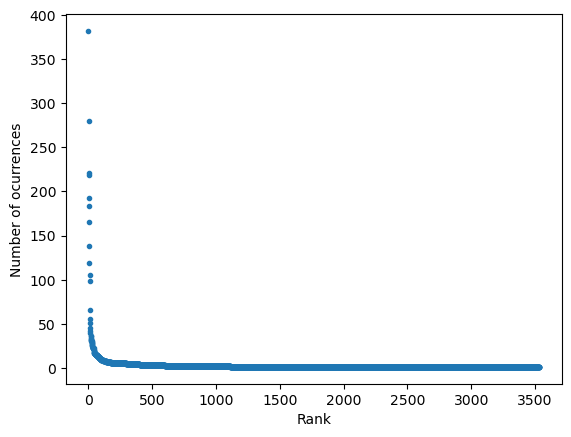

In [27]:
#La función plot_zipf representa gráficamente la relación entre la frecuencia de las palabras ('Number of
#occurrences') y su rango ('Rank').
#La función tiene como argumento el histograma.

def plot_zipf(histogram):
    plt.xlabel('Rank')
    plt.ylabel('Number of ocurrences')
    plt.plot(histogram, '.')
    plt.show()

plot_zipf(zipf_histogram)

### 3.2 Lematización y <i>stemming</i> ###

In [28]:
import nltk
#Importar los métodos de la librería NLTK que lematizan según Wordnet
from nltk.stem.wordnet import WordNetLemmatizer
#Importar los métodos de la librería NLTK que hacen el stemming según el algoritmo Porter Stemmer
from nltk.stem import PorterStemmer

#Definimos el lematizador
lem = WordNetLemmatizer()
print("EL LEMA DE 'FEET' ES", lem.lemmatize('feet'))
print("EL LEMA DE 'ELEPHANTS' ES",lem.lemmatize('elephants'))
print("EL LEMA DE 'COMMUNITIES' ES",lem.lemmatize('communities'))

#Definimos el stemmer
stemmer = PorterStemmer()
print("EL STEM DE 'FEET' ES", stemmer.stem('feet'))
print("EL STEM DE 'ELEPHANTS' ES", stemmer.stem('elephants'))
print("EL STEM DE 'COMMUNITIES' ES", stemmer.stem('communities'))

EL LEMA DE 'FEET' ES foot
EL LEMA DE 'ELEPHANTS' ES elephant
EL LEMA DE 'COMMUNITIES' ES community
EL STEM DE 'FEET' ES feet
EL STEM DE 'ELEPHANTS' ES eleph
EL STEM DE 'COMMUNITIES' ES commun


### 3.3 Términos lematizados y unificados de un texto ###

Representación de los términos lematizados y unificados de los titulares del NYT en forma de <i>word cloud</i>. La lematización se hace consultando Wordnet, que requiere del PoS de la palabra que se quiere lematizar.

In [29]:
#Importar la librería NLTK
import nltk
#Importar tokenizador del paquete NLTK
from nltk import word_tokenize

In [30]:
#Importar los métodos de la librería NLTK que lematizan según Wordnet
from nltk.stem.wordnet import WordNetLemmatizer

#Métodos para obtener el lema consultando Wordnet

#Para obtener el lema, el término debe tener una etiqueta PoS. El formato de la etiqueta PoS de Wordnet es
#distinto de la etiqueta del pos-tagger de NLTK
#La función get_wn_pos traduce el formato de PoS del término según el pos-tagger al formato de PoS de Wordnet
def get_wn_pos(pos):
    if re.match(r'^N',pos):
        wn_pos = 'n'
    elif re.match(r'^V',pos):
        wn_pos = 'v'
    else:
        wn_pos = 'n' #En inglés, los lemas de términos que no son verbos ni nombres se obtienen como si fueran
                        #nombres
    return wn_pos

#La función wnlemmatize lematiza el término con una etiqueta PoS según el lematizador de Wordnet
def wnlemmatize(t,postag):
    lemma = ""
    #Definición del lematizador
    lem = WordNetLemmatizer()
    #Si el candidato es monopalabra, se obtiene el lema con el lematizador de WordNet según su PoS
    if ' ' not in t:
        lemma = lem.lemmatize(t,get_wn_pos(postag[0][1]))
    #Si el candidato es multipalabra, obtenemos su lema como si fuera un nombre, aplicando el lematizador de WordNet
    else:
        lemma = lem.lemmatize(t,'n')
    return lemma

In [31]:
#La función unify convierte la variante sinónima de un término a un término que lo representa. Por ejemplo,
#'mr. trump' o 'donald trump' se unifican en la forma 'trump'

def unify(l):
    term_unified = l
    if l == 'mr. trump' or l == 'donald trump':
        term_unified = 'trump'
    elif l == 'dpt':
        term_unified = 'department'
    return term_unified

La búsqueda del lema se aplica a una palabra o una combinación de palabras que cumplen una serie de condiciones.

In [32]:
#Importar la lista de stopwords en inglés de la librería NLTK
stopwords = nltk.corpus.stopwords.words('english')
#Añadimos stopwords
stopwords = stopwords + ['unknown', 've', 'hadn', 'll', 'didn', 'isn', 'doesn', 'hasn' ]

#no_pos_in es la lista de etiquetas PoS que no pueden tener el token inicial y final de un término.
#Por ejemplo, un término no puede terminar con una preposición ('IN')
no_pos_in = ['DT', 'IN', 'PRP', 'CC', 'CD','MD', 'VBG', 'VBD', 'RP', 'RB']

#Método para evaluar la idoneidad de una palabra o una combinación de palabras
def good_candidate(t,postag):
    v = False
    #Si es multipalabra
    if ' ' in t:
        tl = t.split(' ') #Generamos una lista de tokens
        #el token inicial y el token final deben ser alfabéticos y no pueden estar en la lista de stopwords..
        if re.match("^[a-z]+.*", tl[0]) and re.match("^[a-z]+.*", tl[-1]) and \
           tl[0] not in stopwords and tl[1] not in stopwords:
            #... ni su PoS puede estar en la lista no_pos_in
            if postag[0][1] not in no_pos_in and postag[-1][1] not in no_pos_in:
                v = True
    #Si es monopalabra
    else:
        #debe ser alfabético, y no estar en la lista de stopwords
        if t not in stopwords and re.match("^[a-z]+.*", t):
            #y su PoS no puede estar en la lista no_pos_in
            if postag[0][1] not in no_pos_in:
                v = True
    return v

Las palabras y combinaciones de palabras proceden del aprendizaje de un modelo de <i>phrases</i>. <i>Phrases</i> son expresiones monopalabra y multipalabra que el método <i>good_candidate</i> validará como términos o no. El aprendizaje se realiza a partir de un documento. En este caso, será un documento que recoge todos los titulares.  También pueden aplicarse los métodos de búsqueda de n-gramas explicados en el apartado 2.

In [33]:
#Crear el documento que recoge todos los titulares

import pandas as pd

#Transformamos el contenido del fichero en un dataframe
df= pd.read_csv("ArticlesMarch2018.csv")

#Los textos de los titulares están en la columna 'headline'. Cada titular se considera la unidad discursiva
#de un documento que recoge todos los titulares.

#Creamos el documento con todos los titulares
doc = headline_texts

In [34]:
import gensim
#De la librería Gensim importamos los métodos para aprender a detectar 'phrases'. La librería Gensim está
#hecha para encontrar phrases que son bigramas pero no trigramas. Si se quieren trigramas los phrases bigramas
#pueden convertirse en un token y luego volver a repetir el proceso. También pueden aplicarse los métodos
#explicados en el apartado 2.

from gensim.models.phrases import Phraser
from gensim.models import Phrases

#El método Phrases necesita de los siguientes parámetros
#a) Una lista (text_stream) que recoge los tokens de las unidades discursivas de un documento (oraciones/párrafos).
#En nuestro caso, el text_stream es una lista cuyos elementos son los tokens de cada titular

#b) Una frecuencia mínima de aparición (min_count)

#c) Un umbral de idoneidad para considerar una combinación de palabras como un candidato a colocación. Su función
#es similar a la de las métricas como el PMI. Véase: https://radimrehurek.com/gensim/models/phrases.html y
#Mikolov, et. al: “Distributed Representations of Words and Phrases and their Compositionality”.

#d) El carácter que unirá los componentes del phrase (delimiter). Por ejemplo, 'trade_war'

In [35]:
#Obtener el text_stream, que seran los tokens de cada titular

text_stream = [word_tokenize(d.lower()) for d in df.headline.tolist()]
print(text_stream[:10])

[['virtual', 'coins', ',', 'real', 'resources'], ['u.s.', 'advances', 'military', 'plans', 'for', 'north', 'korea'], ['mr.', 'trump', 'and', 'the', '‘', 'very', 'bad', 'judge', '’'], ['to', 'erase', 'dissent', ',', 'china', 'bans', 'pooh', 'bear', 'and', '‘', 'n', '’'], ['loans', 'flowed', 'to', 'kushner', 'cos.', 'after', 'visits', 'to', 'the', 'white', 'house'], ['china', 'envoy', 'intends', 'to', 'ease', 'trade', 'tensions'], ['president', 'trump', '’', 's', 'contradictory', ',', 'and', 'sometimes', 'false', ',', 'comments', 'about', 'gun', 'policy', 'to', 'lawmakers'], ['classic', 'letter', 'puzzle'], ['silicon', 'valley', 'disruption', 'in', 'an', 'australian', 'school'], ['‘', 'the', 'assassination', 'of', 'gianni', 'versace', '’', 'episode', '6', ':', 'a', 'nothing', 'man']]


In [36]:
#Entrenamos al modelo para que detecte phrases en los titulares

phrases = Phrases(text_stream, min_count=1, threshold=2, delimiter=' ')

#Obtenemos los phrases del documento que contiene todos los titulares

doc_tokens = word_tokenize(doc.lower())
text_phrases = phrases[doc_tokens]

#Imprimimos los primeros 50 phrases
print(text_phrases[:50])

['virtual', 'coins', ',', 'real', 'resources', 'u.s.', 'advances', 'military', 'plans', 'for', 'north korea', 'mr. trump', 'and', 'the', '‘', 'very', 'bad', 'judge', '’', 'to', 'erase', 'dissent', ',', 'china', 'bans', 'pooh', 'bear', 'and', '‘', 'n', '’', 'loans', 'flowed', 'to', 'kushner', 'cos.', 'after', 'visits', 'to', 'the white', 'house', 'china', 'envoy', 'intends', 'to', 'ease', 'trade', 'tensions', 'president', 'trump ’']


Una vez tenemos los <i>phrases</i> del documento, sacamos los signos de puntuación que puedan tener adheridos y nos quedamos con los que son buenos candidatos a términos, según el método <i>good_candidate</i>. Para comprobar si son buenos candidatos a término, primero tenemos que hacer su etiquetaje PoS.

In [37]:
#Importar librería que procesa expresiones regulares
import re

#Sacamos signos de puntuación de los phrases que hay en los titulares

text_phrases_stripped = [tp.strip('".,;:-():!?-‘’ ') for tp in text_phrases]

#Hacemos el etiquetaje de PoS de los phrases que hay en los titulares y lo guardamos en un diccionario (postag)

postag = {}

for tps in text_phrases_stripped:
    postag[tps] = nltk.pos_tag(word_tokenize(tps))

#Obtenemos los phrases que son términos, aplicando el método good_candidate y teniendo en cuenta
#su etiquetaje PoS.

document_terms = [tps for tps in text_phrases_stripped if good_candidate(tps,postag[tps]) == True]

#Imprimimos 10 términos del documento
print(document_terms[:10])

['virtual', 'coins', 'real', 'resources', 'u.s', 'advances', 'military', 'plans', 'north korea', 'mr. trump']


Lematización de los términos según su etiquetaje PoS y unificación.

In [38]:
#Lematizamos los términos según su etiquetaje PoS

lemmas = [wnlemmatize(tm,postag[tm]) for tm in document_terms]

#...y los unificamos

lemmas_unified = [unify(l) for l in lemmas if l != ""]

print(lemmas_unified[:10])

['virtual', 'coin', 'real', 'resource', 'u.s', 'advance', 'military', 'plan', 'north korea', 'trump']


Creación del <i>word cloud</i>.

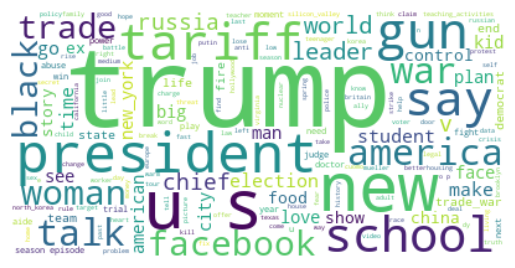

In [39]:
#Para visualizar los términos en un wordcloud, utilizamos la librería de Python wordcloud
#Para instalarlo, se debe escribir "sudo pip install wordcloud"

##Los componentes de un término multipalabra se unen con el símbolo '_'

lemmas2display = " ".join([lu.replace(' ','_') for lu in lemmas_unified])

#La librería realiza el wordcloud a partir de un string. Por ello, es necesario concatenar los términos
#obtenidos en un único string (lemmas2display)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud_sring = " ".join(lemmas_unified)
wordcloud = WordCloud(background_color='white',max_font_size=90).generate(lemmas2display)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3.4 Vectorización de documentos ##

Ejemplificaremos la vectorización de documentos vectorizando los titulares del <i>New York Times</i> con un vectorizador TfIdf.

### 3.4.1. Ejemplo: vectorización de tres titulares del New York Times ###

In [40]:
headlines = ["Trump proclaims tariffs on steel, and a tariff on aluminium and stocks sag in reply",
"Trump embraces a trade war, which could undermine growth"]

In [41]:
#1. Importar métodos de procesamiento de lenguaje natural
#Importar la librería NLTK
import nltk
#Importar tokenizador del paquete NLTK
from nltk import word_tokenize
#Importar los métodos de la librería NLTK que lematizan según Wordnet
from nltk.stem.wordnet import WordNetLemmatizer

#2. Importar la librería con los métodos para realizar la vectorización
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
#Definición del vectorizador y su analyzer

#El método get_n_and_cn_lemmatized es el método con el que el analyzer del vectorizador encuentra los
#términos del texto. Esos términos tienen el pattern N y N+N

def get_n_and_cn_lemmatized(text):
    tokens = [w for w in word_tokenize(text.lower())]
    #Etiquetaje PoS de los tokens
    tagged_tokens = nltk.pos_tag(tokens)
    #Se obtienen los términos con el pattern N y N+N (véase 2.8)
    nps = get_n_and_cn(tagged_tokens)
    #Se lematizan los términos con el pattern N y N+N si tienen más de un carácter. La lematización se hace
    #según el lematizador de Wordnet
    lem_nps = [wnlemmatize(np,nltk.pos_tag([np])) for np in nps if len(np) > 1]
    return lem_nps

#Definición del vectorizador Tf.idf
cv = TfidfVectorizer(
    analyzer= get_n_and_cn_lemmatized
 )

In [43]:
#Vectorización de los titulares
vectorizer = TfidfVectorizer()
cv_fit= cv.fit_transform(headlines)
print("VECTORIZACION TITULAR 0 Y TITULAR 1",'\n',cv_fit)

#Obtenemos los feature names
print ("FEATURE NAMES",'\n', cv.get_feature_names_out())

#Representamos la vectorización de los titulares en forma de arrays
print("ARRAYS TITULARES 0 Y 1", '\n', cv_fit.toarray())

VECTORIZACION TITULAR 0 Y TITULAR 1 
   (0, 3)	0.32433627313894553
  (0, 5)	0.32433627313894553
  (0, 0)	0.32433627313894553
  (0, 4)	0.32433627313894553
  (0, 6)	0.6486725462778911
  (0, 2)	0.32433627313894553
  (0, 9)	0.23076792961123066
  (1, 8)	0.47107781233161794
  (1, 1)	0.47107781233161794
  (1, 10)	0.47107781233161794
  (1, 7)	0.47107781233161794
  (1, 9)	0.33517574332792605
FEATURE NAMES 
 ['aluminium' 'growth' 'proclaims' 'reply' 'steel' 'stock' 'tariff' 'trade'
 'trade_war' 'trump' 'war']
ARRAYS TITULARES 0 Y 1 
 [[0.32433627 0.         0.32433627 0.32433627 0.32433627 0.32433627
  0.64867255 0.         0.         0.23076793 0.        ]
 [0.         0.47107781 0.         0.         0.         0.
  0.         0.47107781 0.47107781 0.33517574 0.47107781]]


### 3.4.2 Vectorización de los  titulares del NYT por su pertenencia a un tipo de documento ###

Creamos una colección de dos documentos. El primer documento contiene los términos de los titulares de tipo TOP y el segundo contiene los términos de los titulares de tipo NONTOP.

In [44]:
#Preparación del corpus

#El fichero del corpus tiene el formato .csv. El fichero contiene los titulares y otros datos organizados en
#forma de tabla. La columna ['Tag'] indica, con una etiqueta, si el titular es TOP o NO TOP (NONTOP).
#Por ello, utilizamos la librería Pandas para crear dos dataframes:
#df1: dataframe de los titulares con la etiqueta TOP
#df2: dataframe de los titulares con la etiqueta NONTOP

import pandas as pd

##Transformamos el contenido del fichero en un dataframe df
df = pd.read_csv('NYT-Comment-Headlines.csv', sep='\t')

#A partir del dataframe df creamos los dataframes df1 y df2 según el valor de 'Tag' de los titulares
df = df.set_index('Tag')
df1 = df.loc['TOP']
df2 = df.loc['NONTOP']

#Ponemos los titulares TOP, que están en la columna 'Headline' de df1, en una lista
top_headlines = df1['Headline'].tolist()
#Ponemos los titulares NO TOP, que están en la columna 'Headline' de df2, en una lista
nontop_headlines = df2['Headline'].tolist()

#Convertimos los titulares TOP en un documento
terms_top_doc = " ".join(top_headlines)
#Convertimos los titulares NO TOP en un documento
terms_nontop_doc = " ".join(nontop_headlines)

#Creamos la colección de documentos
docs_col = [terms_top_doc, terms_nontop_doc]

Transformamos cada documento de la colección en una lista con sus términos lematizados y unificados.

In [45]:
import re

def transform_doc(doc):
    #Obtenemos los phrases según el modelo de detección de phrases que ha aprendido
    doc_phrases = phrases[word_tokenize(doc.lower())]
    #Quitamos los signos de puntuación de los phrases
    text_phrases_stripped = [dp.strip('".,;:-():!?-‘’ ') for dp in doc_phrases if re.match("^[a-z]+.*", dp) ]
    #Hacemos etiquetaje de PoS de los phrases y lo guardamos en un diccionario (postag)
    postag = {}
    for tps in text_phrases_stripped:
        postag[tps] = nltk.pos_tag(word_tokenize(tps))
    #Obtenemos los phrases que son términos, aplicando el método good_candidate y teniendo en cuenta
    #su etiquetaje PoS.
    document_terms = [tps for tps in text_phrases_stripped if good_candidate(tps,postag[tps]) == True]
    #Lematizamos los términos con el lematizador de Wordnet
    terms_lemmatized = [wnlemmatize(dt,postag[dt]) for dt in document_terms]
    #Unificamos los términos
    terms_lemmatized_and_unified = [unify(tl) for tl in terms_lemmatized ]
    #Concatenamos los constituyentes de un término multipalabra con '_'
    terms_lemmatized_and_unified2display = [tlu.replace(' ','_') for tlu in terms_lemmatized_and_unified ]
    return " ".join(terms_lemmatized_and_unified2display)


transf_col = [transform_doc(d) for d in docs_col]

Vectorización de los titulares TOP y NO TOP.

In [46]:
#Importar la librería con los métodos para hacer la vectorización
from sklearn.feature_extraction.text import TfidfVectorizer

#Definimos el vectorizador. Su analyzer busca términos de tipo 'word'. Este tipo incluye los términos monopalabra
#y los términos multipalabra con un formato como 'trade_war'

hv = TfidfVectorizer(
    analyzer= 'word',
    min_df = 1.0 #Proporción de documentos en los que aparece el término (1.0 es la opción por defecto y
                 #significa en todos los documentos).
 )

hv_fit = hv.fit_transform(transf_col)

Los resultados se visualizarán en una tabla con dos columnas. La primera columna contendrá los términos (<i>feature names</i>) de un documento ordenados de mayor a menor por su valor de tf.idf. La segunda columna contendrá el valor de Tf.idf del <i>feature name</i>.

Imaginemos que queremos ver los resultados de los términos de los titulares TOP. En primer lugar, convertiremos la matriz de vectorización en un <i>array</i>, y elegiremos el primer elemento del <i>array</i> (la primera fila de la matriz), porque los titulares TOP son los primeros de la colección.

In [47]:
#Tomamos el array correspondiente a los titulares top
ta = hv_fit.toarray()[0]

#La relación feature name-valor de tf.idf se expresa en forma de tupla. El primer elemento de la tupla es el
#feature name y el segundo elemento es su valor de tf.idf en el documento N, en este caso el documento 0.
#Estas tuplas se van poniendo en una lista (tfidf_tuples) para que luego puedan ordenadarse de mayor a menor valor

tfidf_tuples = []

feature_names = hv.get_feature_names_out()

for i in range(0, len(feature_names)):
    tfidf_tuples.append((feature_names[i], ta[i]))

#Se ordenan las tuplas
sorted_tuples = sorted(tfidf_tuples, key=lambda tup: tup[1], reverse=True)

labels = ['Term', 'TfIdf']

#Se crea un dataframe a partir del cual se construirá la tabla
df3 = pd.DataFrame.from_records(sorted_tuples, columns=labels)

#Construcción y visualización de la tabla
print ("")
print ("Valores de TfIdf de los términos en los titulares TOP")
print ("")

print (df3)


Valores de TfIdf de los términos en los titulares TOP

          Term     TfIdf
0        trump  0.837593
1    president  0.123176
2       school  0.098540
3       tariff  0.098540
4          say  0.086223
..         ...       ...
465      write  0.012318
466      wrong  0.012318
467       year  0.012318
468        yes  0.012318
469      young  0.012318

[470 rows x 2 columns]


## 3.5 Representación de las distancias semánticas con Word2Vec ##

En primer lugar, entrenaremos un modelo Word2Vec de los titulares TOP. Para crear el modelo, cada titular TOP se toma como una oración (<i>sentence</i>) que hay que transformar en una lista de <i>phrases</i> lematizados y unificados.

In [48]:
sentence_stream = df1['Headline'].tolist() # Los textos del dataframe de titulares TOP

postag = {}

def transform_sentence(sentence):
    #Obtenemos los phrases según el modelo de detección de phrases que ha aprendido
    sentence_phrases = phrases[word_tokenize(sentence.lower())]
    #Quitamos los signos de puntuación de los phrases
    phrases_stripped = [st.strip('".,;:-():!?-‘’ ') for st in sentence_phrases if re.match("^[a-z]+.*", st)]
    #Hacemos etiquetaje de PoS de los phrases y lo guardamos en un diccionario (postag)
    for ps in phrases_stripped:
        postag[ps] = nltk.pos_tag(word_tokenize(ps))
    #Lematizamos los phrases con el lematizador de Wordnet
    phrases_lemmatized = [wnlemmatize(ps,postag[ps]) for ps in phrases_stripped]
    #Unificamos los phrases
    phrases_lemmatized_and_unified = [unify(pl) for pl in phrases_lemmatized ]
    return phrases_lemmatized_and_unified


transformed_sentences = [transform_sentence(ss) for ss in sentence_stream ]

print(transformed_sentences[:5])

[['trump', 'and', 'the', 'very', 'bad', 'judge'], ['loan', 'flow', 'to', 'kushner', 'co', 'after', 'visit', 'to', 'the white', 'house'], ['goodbye', 'pay-as-you-wish'], ['can', 'venezuela', 'be', 'save'], ['say', 'a', 'prayer', 'i don', 'believe', 'in']]


Crear el modelo Word2Vec.

In [49]:
w2vnyt = gensim.models.Word2Vec(
        transformed_sentences,
        vector_size=150, # Tamaño de las dimensiones del vector
        window=10, #context window (10 palabras a la izquierda y 10 palabras a la derecha)
        min_count= 3, #Frecuencia mínima
        workers= 1,
        seed=1 # Valor de inicio predefinido para conservar la coherencia
)
#... y lo entrenamos con los documentos transformados
w2vnyt.train(transformed_sentences, total_examples=len(transformed_sentences), epochs=10)

(5308, 25040)

In [50]:
#Del vocabulario de phrases del modelo Word2Vec obtenemos los que son términos

phrases_vocabulary = list(w2vnyt.wv.index_to_key)

def phrase_is_term(phrase):
    test = False
    if phrase not in postag:
        pos = nltk.pos_tag(word_tokenize(phrase))
    else:
        pos = postag[phrase]
    if good_candidate(phrase,pos):
        test = True
    return test

terms_vocabulary = [pv for pv in phrases_vocabulary if phrase_is_term(pv) == True]

print(terms_vocabulary)

['trump', 'president', 'u.s', 'tariff', 'school', 'say', 'trade', 'trade war', 'get', 'facebook', 'new', 'team', 'picture', 'state', 'aide', 'war', 'america', 'gun', 'house', 'win', 'go', 'bolton', 'good', 'talk', 'lawyer', 'chief', 'target', 'end', 'face', 'democrat', 'left', 'plan', 'security', 'voter', 'sue', 'race', 'control', 'show', 'problem', 'age', 'college', 'job', 'g.o.p', 'retreat', 'next', 'fear', 'grow', 'kushner', 'mueller', 'lead', 'teacher', 'take', 'stop', 'firm', 'play', 'power', 'data', 'chaos', 'make', 'c.e.o', 'join', 'point', 'ask', 'gun control', 'sign', 'knew', 'woman', 'porn star', 'debate', 'silence', 'russia', 'fire', 'saudi', 'prison', 'deputy', 'abuse', 'charge', 'sex', 'hold', 'void', 'class', 'call', 'man']


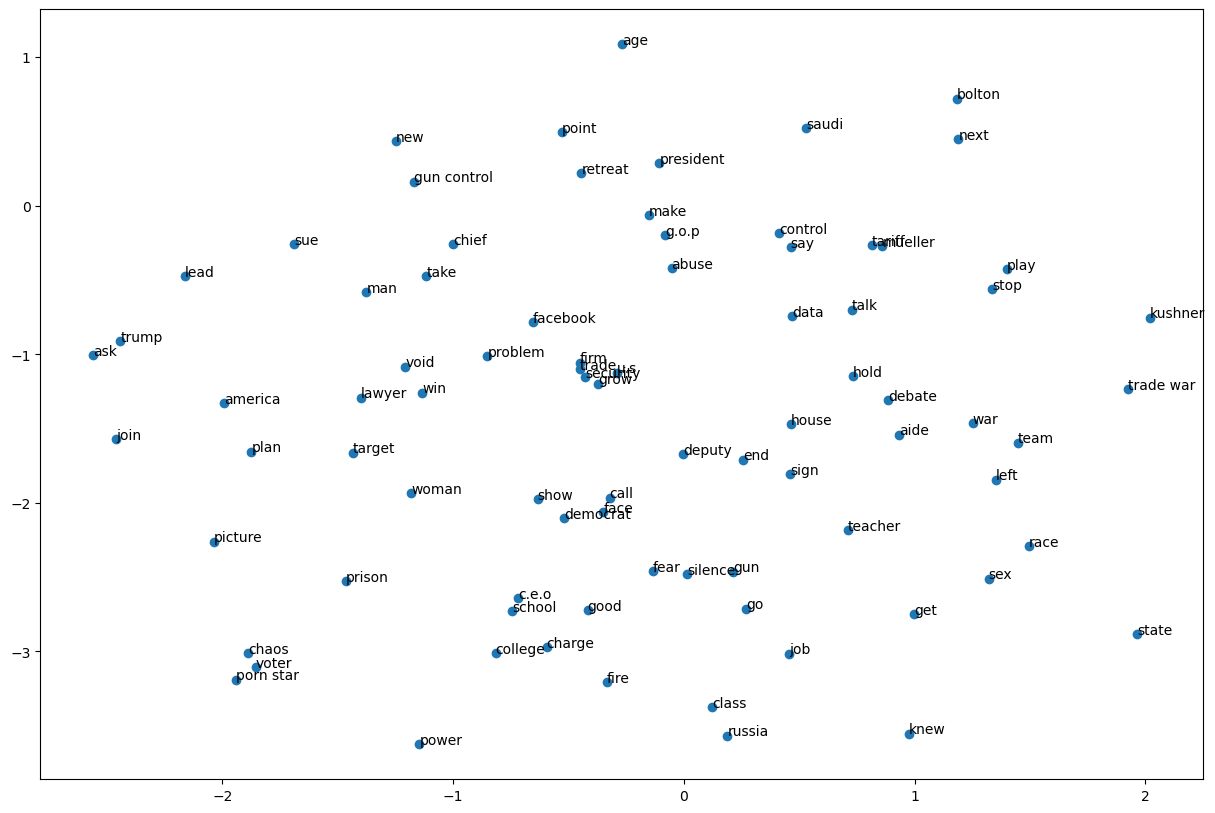

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

#Visualizamos los word embeddings mediante TSNE

X = w2vnyt.wv[terms_vocabulary]
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=terms_vocabulary, columns=['x', 'y'])
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

Buscamos las compañías de Trump (términos más próximos a Trump según Word2Vec).

In [52]:
term = 'trump'

#Considerando los términos como feature names, la relación feature name-distancia se expresa en forma de tupla.
#El primer elemento de la tupla es el feature name y el segundo elemento es su valor de distancia a un término
#de referencia (e.g. Trump) según #Word2Vec. Estas tuplas se van poniendo en una lista (w2v_tuples) para que luego
#puedan ser ordenadas de más cercanas a menos cercanas

w2v_tuples = []

feature_names = terms_vocabulary

#Para cada feature name, calculamos su distancia respecto al término de referencia con el método model.similarity.
#Si la distancia es superior a 0, la tupla se pone en la lista de tuplas
for i in range(0, len(feature_names)):
    if feature_names[i] != term and w2vnyt.wv.similarity(term, feature_names[i]) > 0:
        w2v_tuples.append((feature_names[i], w2vnyt.wv.similarity(term, feature_names[i])))

#Se ordenan las tuplas
w2v_sorted_tuples = sorted(w2v_tuples, key=lambda tup: tup[1], reverse=True)

print(w2v_sorted_tuples)

labels = ['Term', 'Distance']

#Se crea dataframe a partir del cual se construirá la tabla
df4 = pd.DataFrame.from_records(w2v_sorted_tuples, columns=labels)

#Construcción y visualización de la tabla
print ("")
print ("Distancia respecto al término", term)
print ("")

print (df4)

[('join', 0.37176728), ('lead', 0.3581282), ('lawyer', 0.34885314), ('facebook', 0.34091717), ('gun', 0.33998045), ('ask', 0.3269344), ('america', 0.3114568), ('end', 0.30427408), ('deputy', 0.29629624), ('charge', 0.28474557), ('democrat', 0.27302057), ('retreat', 0.26762867), ('c.e.o', 0.25919217), ('man', 0.2554764), ('race', 0.25112304), ('plan', 0.24429172), ('picture', 0.23385921), ('house', 0.23240596), ('grow', 0.22964005), ('fire', 0.22822523), ('prison', 0.22497785), ('school', 0.22377375), ('chief', 0.22346461), ('u.s', 0.21520615), ('debate', 0.2143082), ('say', 0.21303993), ('show', 0.2127564), ('sex', 0.21201667), ('kushner', 0.20882319), ('woman', 0.2080139), ('target', 0.2060909), ('voter', 0.1994239), ('team', 0.19898012), ('win', 0.19619006), ('call', 0.19320253), ('trade', 0.18499261), ('left', 0.18260837), ('college', 0.17656964), ('abuse', 0.17459473), ('sue', 0.17288387), ('firm', 0.1663371), ('security', 0.16510256), ('face', 0.15831049), ('get', 0.1519216), ('bo

## 4. Detección de temas ##

Primero abordaremos la detección de temas comprobando si los términos de los titulares TOP pueden agruparse por similitud semántica según <b>Wordnet</b>.

### 4.1 Cálculo de similitud semántica según Wordnet ###

In [53]:
#Ejemplos de cálculo de similitud semántica según Wordnet

from nltk.corpus import wordnet as wn

#Establecemos el synset más frecuente de las palabras 'dog', 'cat', 'united states' y 'white house'
#con nombre como su PoS. Serán los synsets de referencia
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')
united_states = wn.synset('united_states.n.01')
spain = wn.synset('spain.n.01')

print("LA DISTANCIA SEMÁNTICA ENTRE 'DOG' Y 'CAT' ES ", cat.wup_similarity(dog)) #Wu and Palmer score

print("LA DISTANCIA SEMÁNTICA ENTRE 'UNITED STATES' Y 'SPAIN' ES ", united_states.wup_similarity(spain))

LA DISTANCIA SEMÁNTICA ENTRE 'DOG' Y 'CAT' ES  0.8571428571428571
LA DISTANCIA SEMÁNTICA ENTRE 'UNITED STATES' Y 'SPAIN' ES  0.8


In [54]:
from nltk.corpus import wordnet as wn

#Dados dos términos, queremos comprobar si tienen sentidos (synsets) parecidos

terms = ['attack', 'fire']

#Obtenemos el vocabulario de synsets de los términos

term_synsets = [wn.synsets(t,'n') for t in terms] #synsets de los dos términos cuando son un nombre

print("SYNSETS DE LOS TÉRMINOS", term_synsets)

#Ponemos todos los synsets de los dos términos en una sola lista

import itertools

vocabulary_synsets = list(itertools.chain.from_iterable(term_synsets))

print("VOCABULARIO DE SYNSETS",vocabulary_synsets)


SYNSETS DE LOS TÉRMINOS [[Synset('attack.n.01'), Synset('attack.n.02'), Synset('fire.n.09'), Synset('approach.n.01'), Synset('attack.n.05'), Synset('attack.n.06'), Synset('attack.n.07'), Synset('attack.n.08'), Synset('attack.n.09')], [Synset('fire.n.01'), Synset('fire.n.02'), Synset('fire.n.03'), Synset('fire.n.04'), Synset('fire.n.05'), Synset('ardor.n.03'), Synset('fire.n.07'), Synset('fire.n.08'), Synset('fire.n.09')]]
VOCABULARIO DE SYNSETS [Synset('attack.n.01'), Synset('attack.n.02'), Synset('fire.n.09'), Synset('approach.n.01'), Synset('attack.n.05'), Synset('attack.n.06'), Synset('attack.n.07'), Synset('attack.n.08'), Synset('attack.n.09'), Synset('fire.n.01'), Synset('fire.n.02'), Synset('fire.n.03'), Synset('fire.n.04'), Synset('fire.n.05'), Synset('ardor.n.03'), Synset('fire.n.07'), Synset('fire.n.08'), Synset('fire.n.09')]


In [55]:
#Para cada synset del vocabulario creamos un vector que representa la distancia semántica de este synset con cada
#uno de los synsets restantes.
#El vector se construye con la función create_vector que tiene como argumento un synset
#La distancia semántica se obtiene con la función get_similarity, que tiene como argumentos los dos synsets sobre
#los que se calcula la distancia

def get_similarity(vs1,vs2):
    d = 0.0
    d1 = vs1.wup_similarity(vs2)  #Wu and Palmer score
    if d1 != None:
        d = d1
    return d

def create_vector(synset):
    vector = [get_similarity(synset,vs) for vs in vocabulary_synsets]
    return vector

#Obtenemos los vectores de cada synset del vocabulario de synsets
synset_vectors = [create_vector(v) for v in vocabulary_synsets]

print("VECTORES DE SYNSET", synset_vectors)

VECTORES DE SYNSET [[1.0, 0.75, 0.26666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5555555555555556, 0.5, 0.15384615384615385, 0.26666666666666666, 0.5714285714285714, 0.9411764705882353, 0.11764705882352941, 0.10526315789473684, 0.26666666666666666, 0.26666666666666666, 0.14285714285714285, 0.47058823529411764, 0.26666666666666666], [0.75, 1.0, 0.26666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5555555555555556, 0.5, 0.15384615384615385, 0.26666666666666666, 0.5714285714285714, 0.7058823529411765, 0.11764705882352941, 0.10526315789473684, 0.26666666666666666, 0.26666666666666666, 0.14285714285714285, 0.47058823529411764, 0.26666666666666666], [0.26666666666666666, 0.26666666666666666, 1.0, 0.23529411764705882, 0.23529411764705882, 0.23529411764705882, 0.26666666666666666, 0.16666666666666666, 0.8571428571428571, 0.3076923076923077, 0.25, 0.125, 0.1111111111111111, 0.2857142857142857, 0.2857142857142857, 0.15384615384615385, 0.25, 1.0], [0.6666666666666666, 0.66

In [56]:
#Clustering con K-means

from numpy import matrix, asarray
from sklearn.cluster import KMeans

#El conjunto de vectores de synsets se transforman en una matriz
X = matrix(synset_vectors)
#Se define el número de clústeres
num_clusters = 3

#Se define el modelo de clustering
km = KMeans(n_clusters=num_clusters, n_init=10) # número inicial para mantener la consistencia

#El modelo se aplica a la matriz de vectores
X = asarray(X)
km.fit(X)

labels = km.labels_.tolist()

#Resultado

print("CLÚSTERES A LOS QUE PERTENECEN LOS SYNSETS", labels)

CLÚSTERES A LOS QUE PERTENECEN LOS SYNSETS [0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1]


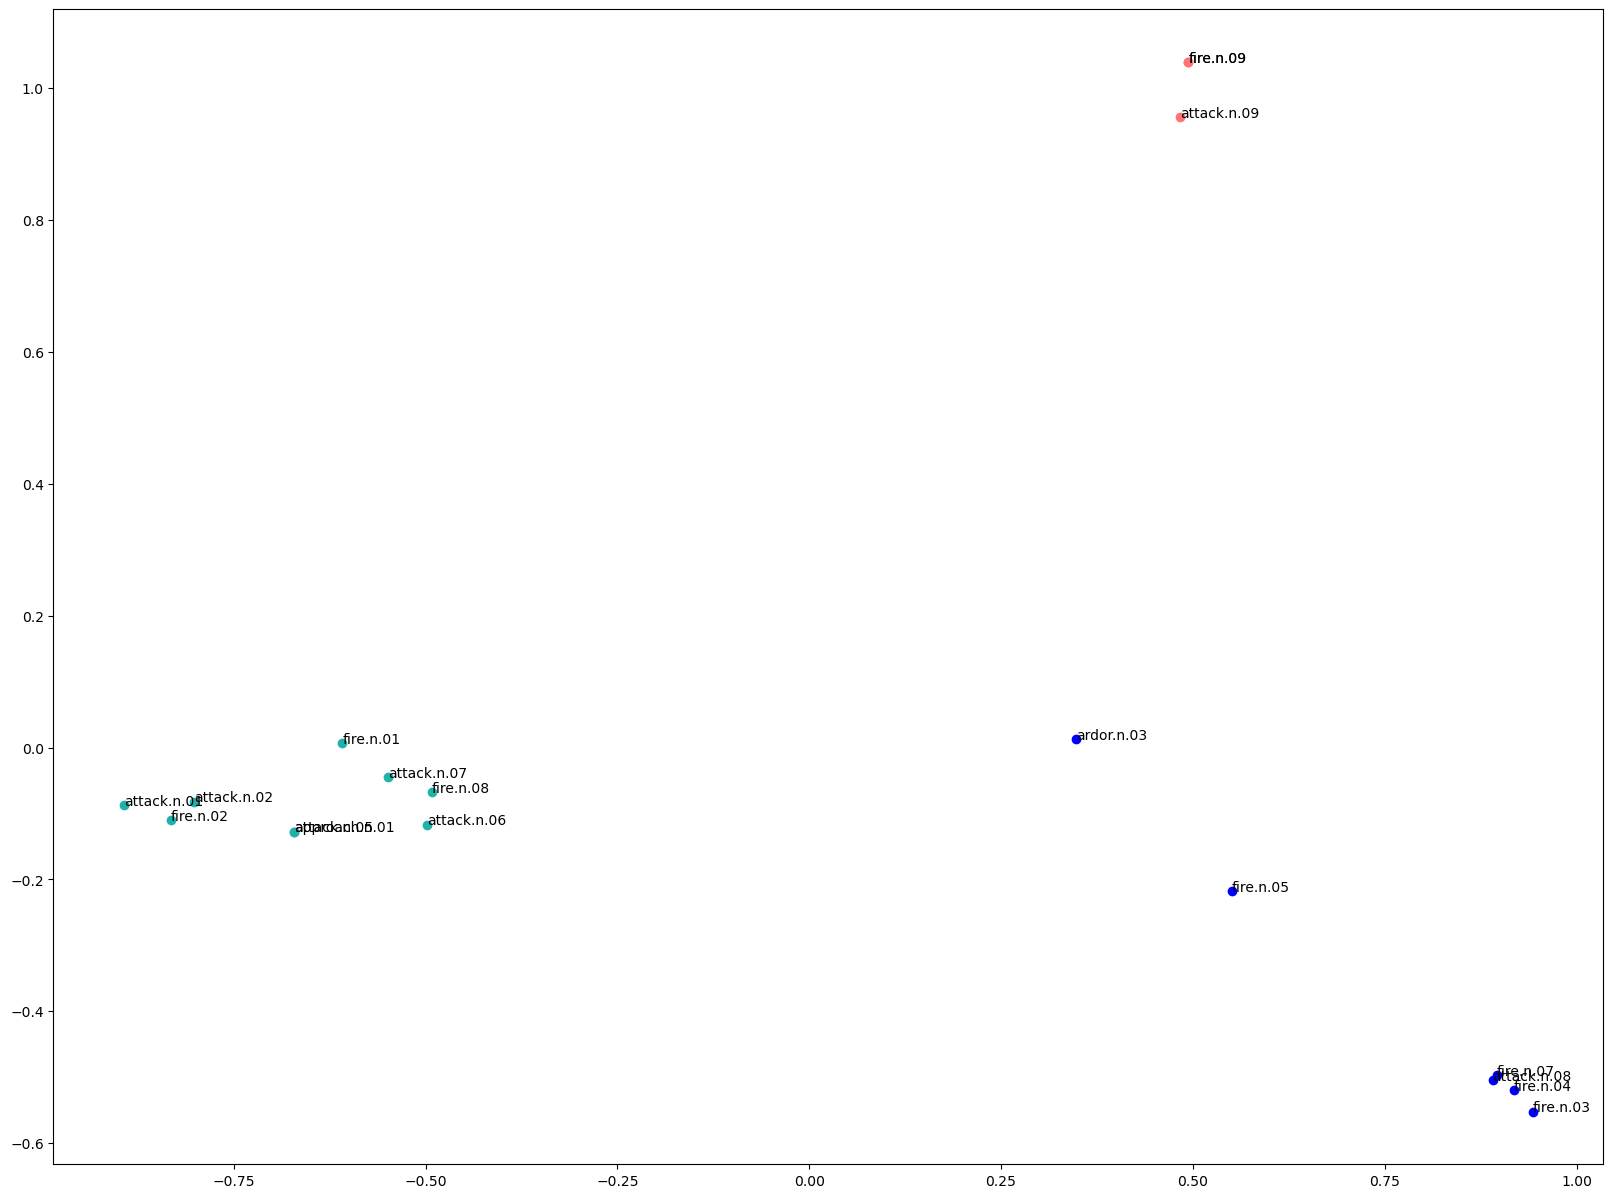

In [57]:
#Visualización

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#La reducción de dimensionalidad de los vectores se realiza con el método PCA

reduced_data = PCA(n_components=2).fit_transform(X)

#Representación gráfica del clustering

labels_color_map = {
    0: '#20b2aa', 1: '#ff7373' , 2: 'blue'
}

fig, ax = plt.subplots(figsize=(20,15))
for index, instance in enumerate(reduced_data):
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
    ax.annotate(vocabulary_synsets[index].name(),xy=(pca_comp_1, pca_comp_2))
plt.show()


In [58]:
#Comprobamos que los dos términos tienen sentidos parecidos
#Obtenemos la definición (o glosa) de los synsets de Wordnet que forman un clúster

print("FIRE.n.09':", wn.synset('fire.n.09').definition())
print("ATTACK.n.09':", wn.synset('attack.n.09').definition())

FIRE.n.09': intense adverse criticism
ATTACK.n.09': strong criticism


Cuando un término no se encuentra en Wordnet, podemos recurrir a la <b>DBpedia</b> para encontrar su synset.

In [59]:
!pip install pydbpedia

In [60]:
from pydbpedia import PyDBpedia, namespace

def get_dbpedia_synset(term):
    Db_query = term
    if term == 'Trump':
        Db_query = 'Donald_Trump'
    dbpedia_wrapper = PyDBpedia(endpoint="http://dbpedia.org/sparql")
    objects = dbpedia_wrapper.get_objects(subjects=["http://dbpedia.org/resource/" + Db_query], predicates=['http://dbpedia.org/property/wordnet_type'])
    return objects

synset = get_dbpedia_synset('Trump')[0]
print(synset)

http://www.w3.org/2006/03/wn/wn20/instances/synset-celebrity-noun-1


### 4.2 Cálculo de similitud semántica según ConceptNet ###

Comparación entre los resultados de similitud semántica con <b>Wordnet</b> y con <b>ConceptNet</b>.

In [61]:
from nltk.corpus import wordnet as wn

united_states = wn.synset('united_states.n.01')
white_house = wn.synset('white_house.n.01')

print("LA DISTANCIA SEMÁNTICA ENTRE 'UNITED STATES' Y 'WHITE HOUSE' SEGÚN WORDNET ES ", \
      white_house.wup_similarity(united_states))

import requests

obj = requests.get('http://api.conceptnet.io/related/c/en/united_states?filter=/c/en/white_house').json()

print("LA DISTANCIA SEMÁNTICA ENTRE 'UNITED STATES' Y 'WHITE HOUSE' SEGÚN CONCEPTNET ES ", \
      obj['related'][0]['weight'])

LA DISTANCIA SEMÁNTICA ENTRE 'UNITED STATES' Y 'WHITE HOUSE' SEGÚN WORDNET ES  0.08695652173913043
LA DISTANCIA SEMÁNTICA ENTRE 'UNITED STATES' Y 'WHITE HOUSE' SEGÚN CONCEPTNET ES  0.356


### 4.3 LDA ###

Abordamos ahora la detección de temas en los titulares TOP aplicando <b>LDA</b>. La distinción de temas se hace con términos nominales. Esto es, nombres y términos multipalabra con el <i>pattern</i> N+N.

In [62]:
#Vocabulari el del model Word2vec

import nltk
from nltk.corpus import wordnet as wn

def isnp(t):
    v = False
    #Si el término es una multipalabra, asumimos que es un término nominal
    if ' ' in t:
        v = True
    #Si el término monopalabra no tiene synset en Wordnet, asumimos que es un término nominal que todavía no se ha
    #incluido en Wordnet
    elif wn.synsets(t) == []:
        v = True
    else:
        try:
            #Si existe un synset del término que es nominal, entonces el término es nominal
            wn.synset(t + '.n.01')
            v = True
        except:
            pass
    return v


def get_nominals(sentence):
    #Términos nominales con una frecuencia mínima de 3 (son los términos del modelo Word2Vec)
    nps = [np for np in sentence if np in terms_vocabulary
           and isnp(np) == True ]
    return nps

nps_in_sentences = [get_nominals(ts) for ts in transformed_sentences if len(get_nominals(ts)) > 0]


In [63]:
#Librerías para realizar el LDA

import gensim
import gensim.corpora as corpora

#Método para hacer el LDA

def lda(terms):
    dictionary = corpora.Dictionary(terms)
    #print(dictionary)
    # Creación del corpus
    texts = terms
    # Frecuencia de los términos en cada documento. El formato está en forma de tupla,
    #(índice del término en el diccionario/vocabulario, frecuencia). Por ejemplo, [(0, 2), (1, 1), (2, 1), (3, 1)])
    corpus = [dictionary.doc2bow(text) for text in texts]
    #Creación del modelo.
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, # Frecuencia de los términos en cada documento
                                               num_topics=7, #Número de temas
                                               random_state=1, #Valor de inicio predefinido para conservar
                                                               #coherencia
                                               id2word = dictionary, #El vocabulario
                                               passes=500) # Cuantos más pases, más consistente el modelo

    return ldamodel

ldamodel = lda(nps_in_sentences)

In [64]:
#Visualización del LDA

#Librería para crear matrices
import numpy as np

#Librerías para la visualización
import pandas as pd
from IPython.display import display, HTML


# Matriz donde se muestran los diez términos del vocabulario más probables de pertenecer a un topic.

K = ldamodel.num_topics
topicWordProbMat = ldamodel.print_topics(num_topics=K, num_words=10)

#La matriz se muestra como un dataframe
columns = ['1','2','3', '4', '5','6','7']
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 2000)

zz = np.zeros(shape=(1000,K))

last_number=0
DC={}

for x in range (10):
    data = pd.DataFrame({columns[0]:"",
                         columns[1]:"",
                         columns[2]:"",
                         columns[3]:"",
                         columns[4]:"",
                         columns[5]:"",
                         columns[6]:"",
                        },index=[0])
    df = pd.concat([df, data], ignore_index=True)


for line in topicWordProbMat:
    topic, word = line
    probabilities=word.split("+")
    print(probabilities)
    y=0
    for pr in probabilities:
        a=pr.split("*")
        df.iloc[y,topic] = a[1]
        if a[1] in DC:
                zz[DC[a[1]]][topic]=a[0]
        else:
            zz[last_number][topic]=a[0]
            DC[a[1]]=last_number
            last_number=last_number+1
            y=y+1

#Ordenar strings con números
def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    def atoi(text):
        return int(text) if text.isdigit() else text

    return [atoi(c) for c in re.split('(\d+)', text)]

df = df.reindex(columns=sorted(df.columns, key=natural_keys))
display(HTML(df.to_html()))

['0.573*"trump" ', ' 0.071*"trade" ', ' 0.041*"talk" ', ' 0.031*"chaos" ', ' 0.031*"point" ', ' 0.031*"g.o.p" ', ' 0.031*"voter" ', ' 0.021*"fear" ', ' 0.021*"job" ', ' 0.013*"show"']
['0.108*"facebook" ', ' 0.090*"state" ', ' 0.073*"college" ', ' 0.072*"sue" ', ' 0.072*"go" ', ' 0.055*"abuse" ', ' 0.055*"call" ', ' 0.055*"data" ', ' 0.055*"firm" ', ' 0.038*"stop"']
['0.112*"team" ', ' 0.093*"aide" ', ' 0.075*"bolton" ', ' 0.075*"target" ', ' 0.057*"race" ', ' 0.057*"mueller" ', ' 0.057*"saudi" ', ' 0.039*"president" ', ' 0.039*"class" ', ' 0.039*"fire"']
['0.111*"school" ', ' 0.070*"picture" ', ' 0.070*"war" ', ' 0.057*"gun" ', ' 0.057*"good" ', ' 0.057*"win" ', ' 0.057*"democrat" ', ' 0.057*"age" ', ' 0.057*"president" ', ' 0.043*"left"']
['0.112*"get" ', ' 0.112*"trade war" ', ' 0.075*"problem" ', ' 0.075*"control" ', ' 0.057*"face" ', ' 0.057*"house" ', ' 0.057*"c.e.o" ', ' 0.057*"charge" ', ' 0.039*"president" ', ' 0.039*"job"']
['0.154*"u.s" ', ' 0.099*"america" ', ' 0.080*"lawye

,1,2,3,4,5,6,7
0,"""trump""","""facebook""","""team""","""school""","""get""","""u.s""","""tariff"""
1,"""trade""","""state""","""aide""","""picture""","""trade war""","""america""","""say"""
2,"""talk""","""college""","""bolton""","""war""","""problem""","""lawyer""","""plan"""
3,"""chaos""","""sue""","""target""","""gun""","""control""","""security""","""russia"""
4,"""point""","""go""","""race""","""good""","""face""","""sex""","""gun control"""
5,"""g.o.p""","""abuse""","""mueller""","""win""","""house""","""lead""","""teacher"""
6,"""voter""","""call""","""saudi""","""democrat""","""c.e.o""","""play""","""void"""
7,"""fear""","""data""","""president""","""age""","""charge""","""power""","""sign"""
8,"""job""","""firm""","""class""","""left""","""job""","""woman""","""join"""
9,"""show""","""stop""","""fire""",,,"""president""",


## 5. Predicción ##

Entendemos como predicción la clasificación automática de un dato. Por ejemplo, entendemos que cuando un sistema  clasifica automáticamente un titular como TOP está prediciendo que este titular motivará muchos comentarios. Mostraremos la predicción de si un titular motivará o no comentarios, aplicando un método de clasificación automática, basado en aprendizaje automático (<i>machine learning</i>).

<b>Preprocesado</b>

In [65]:
import pandas as pd
import re

#Data labelling

#Convertimos el contenido del fichero de los titulares en un dataframe
df = pd.read_csv('NYT-Comment-Headlines.csv', sep='\t')

#La clase de cada titular está ya declarada en la columna 'Tag', en la que el titular está etiquetado como 'TOP'
#o 'NOTOP'. Podemos, por tanto, hacer el tag labelling. Para ello se crean dos listas:
#data: lista que recoge los titulares
#data_labels: lista de las etiquetas de los titulares, en el mismo orden en que están los titulares en 'data'

data = []
data_labels = []

headlines = df['Headline'].tolist()
tags = df['Tag'].tolist()

for i in range(len(headlines)):
    data.append(headlines[i])
    data_labels.append(tags[i])

#El preprocesado requiere crear un modelo con la vectorización de los titulares. El vectorizador será un
#tfidf vectorizer

#1. Encontramos los phrases que ya ha aprendido a detectar en cada titular y seleccionamos los que son términos

def transform_sentence(sentence):
    sentence_terms = phrases[word_tokenize(sentence.lower())]
    #Despojamos los signos de puntuación de los términos
    stripped_candidates = [st.strip('".,;:-():!?-‘’ ') for st in sentence_terms]
    #Unificamos los términos
    terms_unified = [unify(sc).lstrip(' ') for sc in stripped_candidates] #(ver 3.3)
    #Lematizamos los términos con el lematizador de Wordnet
    terms_lemmatized_and_unified = [wnlemmatize(ut,nltk.pos_tag(word_tokenize(ut))).replace(' ', '_') \
                                    for ut in terms_unified \
                                    if good_candidate(ut,nltk.pos_tag(word_tokenize(ut))) == True] #(ver 3.3)
    return terms_lemmatized_and_unified

terms_stream = [transform_sentence(dt) for dt in data]

#2. Convertimos la lista de términos de cada titular en un documento y lo añadimos a la colección

documents = [" ".join(ts) for ts in terms_stream]

print(documents[:10])

#3. Vectorización de los titulares (modelo bag of words)
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizerNYT = TfidfVectorizer(
    analyzer= 'word',
 )
X = vectorizerNYT.fit_transform(documents)
#Matriz con los vectores
MNYT = X.toarray()

#Obtenemos los feature names
feature_names = np.array(vectorizerNYT.get_feature_names_out())
#print(feature_names)
print(MNYT)


['virtual coin real resource', 'u.s advance military plan north_korea', 'trump bad judge', 'erase dissent china ban pooh bear n', 'loan flow kushner co visit house', 'china envoy intend ease trade tension', 'president trump contradictory false comment gun policy lawmaker', 'classic letter puzzle', 'silicon_valley disruption australian school', 'gianni_versace episode nothing man']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<b>Preparación del corpus de entrenamiento y de test.</b>

In [66]:
#1. Importar métodos para crear un corpus de entrenamiento y evaluación
from sklearn.model_selection import train_test_split

#Preparación del corpus de entrenamiento y el corpus de test

#x_train: array de los vectores de los documentos en el corpus de entrenamiento (valores tf.idf)
#y_train: sus etiquetas correspondientes (TOP, NONTOP)

#x_test: array de los vectores de los documentos en el corpus de test (valores tf.idf)
#y_test: sus etiquetas correspondientes (TOP, NONTOP)

X_train, X_test, y_train, y_test  = train_test_split(
        MNYT,
        data_labels,     # Etiquetas de los datos
        train_size=0.80, # Se dedica el 80% del corpus total al corpus de entrenamiento
        random_state=1234)

<b>Entrenamiento</b>

In [67]:
#2. Importar clasificador
from sklearn.linear_model import LogisticRegression

#Establecemos el método de clasificación (método logistic regression)
classifier = LogisticRegression()
#Entrenamiento del clasificador aplicando el método al corpus de entrenamiento
log_model = classifier.fit(X=X_train, y=y_train)

<b>Clasificación</b>

In [68]:
#Resultados de la clasificación/predicción del clasificador entrenado al corpus de test
y_pred = log_model.predict(X_test)

print("\nCLASES TOP/NONTOP DEL CORPUS DE TEST:\n===============")

print(y_pred)

def most_informative_feature_for_binary_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)

print("\nFEATURES MÁS INFORMATIVOS EN LOS TITULARES TOP Y NO TOP:\n===============")

print(most_informative_feature_for_binary_classification(vectorizerNYT, classifier))


CLASES TOP/NONTOP DEL CORPUS DE TEST:
['NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'TOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'TOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP' 'NONTOP'
 'NONTOP' 'NONTOP'